In [1]:
#ипмпортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
#импортируем данные
df = pd.read_excel(r'C:\Users\Maksim\Downloads\train.xlsx')

In [9]:
#проведем разведывательный анализ данных (EDA)
print(df.head(), '\n')
print(df.info(), '\n')
print(df.describe(include= 'all'))

     ID Order Date     Class       Region Sub-Category     Sales
0   646 2018-12-30  Стандарт         Урал   Appliances  37229.08
1   907 2018-12-30  Стандарт  Владивосток    Bookcases  20994.61
2   908 2018-12-30  Стандарт  Владивосток       Phones  42133.86
3   909 2018-12-30  Стандарт  Владивосток      Binders  10612.00
4  1297 2018-12-30  Стандарт   Калиниград      Binders  28781.13 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB
None 

            

Пропущенных значений нет, белый шум не наблюдается.

In [65]:
#Задание 1_а
task1_a = df.groupby('Sub-Category', as_index=False).agg({'Sales': 'sum', 'ID': 'count'})
task1_a.columns = ['Sub-Category', 'Sales_sum', 'ID_count']
#для удобства выведем цифры в читаемом виде
print(task1_a.sort_values('Sales_sum', ascending= False)[:4].to_string(float_format='{:,.2f}'.format).replace(',', ' ') , '\n')
print(task1_a.sort_values('ID_count', ascending= False)[:4].to_string(float_format='{:,.2f}'.format).replace(',', ' '))

   Sub-Category     Sales_sum  ID_count
3       Binders 33 911 974.30      1492
12        Paper 30 690 768.27      1338
9   Furnishings 21 565 065.95       931
13       Phones 20 343 265.96       876 

   Sub-Category     Sales_sum  ID_count
3       Binders 33 911 974.30      1492
12        Paper 30 690 768.27      1338
9   Furnishings 21 565 065.95       931
13       Phones 20 343 265.96       876


В нашем случае частота продаж совпала с суммой продаж, четыре самые популярные категории: 'Binders', 'Paper', 'Furnishings', 'Phones'.

In [70]:
#Задание 1_b
last_two_years = sorted(df['Order Date'].dt.year.unique())[-2:]
task1_b = df[df['Order Date'].dt.year.isin(last_two_years)].groupby('Sub-Category', as_index=False).agg({'Sales': 'sum', 'ID': 'count'})
task1_b.columns = ['Sub-Category', 'Sales_sum', 'ID_count']
#для удобства выведем цифры в читаемом виде
print(task1_b.sort_values('Sales_sum', ascending= False)[:4].to_string(float_format='{:,.2f}'.format).replace(',', ' ') , '\n')
print(task1_b.sort_values('ID_count', ascending= False)[:4].to_string(float_format='{:,.2f}'.format).replace(',', ' '))

   Sub-Category     Sales_sum  ID_count
3       Binders 20 332 043.22       900
12        Paper 19 112 040.45       809
9   Furnishings 12 594 092.00       557
13       Phones 12 030 705.09       510 

   Sub-Category     Sales_sum  ID_count
3       Binders 20 332 043.22       900
12        Paper 19 112 040.45       809
9   Furnishings 12 594 092.00       557
13       Phones 12 030 705.09       510


Видим те же категории, что и в предыдущем задании.

In [73]:
#Задание 2_c
last_year = sorted(df['Order Date'].dt.year.unique())[-1:]
task1_c = df[df['Order Date'].dt.year.isin(last_year)].groupby('Sub-Category', as_index=False).agg({'Sales': 'sum', 'ID': 'count'})
task1_c.columns = ['Sub-Category', 'Sales_sum', 'ID_count']
#для удобства выведем цифры в читаемом виде
print(task1_c.sort_values('Sales_sum', ascending= False)[:4].to_string(float_format='{:,.2f}'.format).replace(',', ' ') , '\n')
print(task1_c.sort_values('ID_count', ascending= False)[:4].to_string(float_format='{:,.2f}'.format).replace(',', ' '))

   Sub-Category     Sales_sum  ID_count
3       Binders 11 431 527.00       492
12        Paper 10 616 645.21       452
9   Furnishings  7 317 575.78       310
13       Phones  6 730 458.18       290 

   Sub-Category     Sales_sum  ID_count
3       Binders 11 431 527.00       492
12        Paper 10 616 645.21       452
9   Furnishings  7 317 575.78       310
13       Phones  6 730 458.18       290


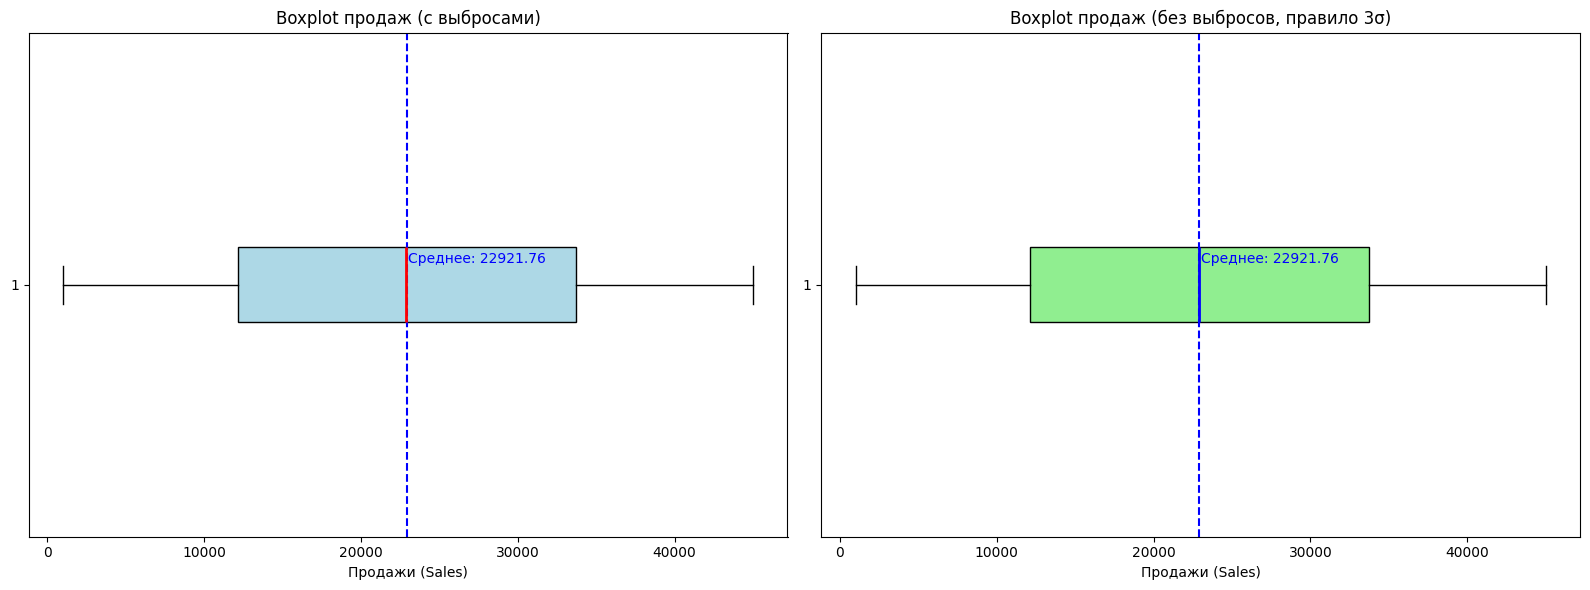

In [80]:
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 1. Boxplot с выбросами
axes[0].boxplot(df['Sales'], vert=False, patch_artist=True, showfliers=True,
                 boxprops=dict(facecolor='lightblue'),
                 medianprops=dict(color='red', linewidth=2))
axes[0].set_xlabel('Продажи (Sales)')
axes[0].set_title('Boxplot продаж (с выбросами)')
mean_value = df['Sales'].mean()
axes[0].axvline(mean_value, color='blue', linestyle='--')
axes[0].text(mean_value + 100, 1.05, f'Среднее: {mean_value:.2f}', 
             color='blue', fontsize=10, ha='left', va='center')

# 2. Boxplot без выбросов (правило 3σ)
mean = df['Sales'].mean()
std = df['Sales'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
filtered_df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

axes[1].boxplot(filtered_df['Sales'], vert=False, patch_artist=True, showfliers=True,
                 boxprops=dict(facecolor='lightgreen'),
                 medianprops=dict(color='blue', linewidth=2))
axes[1].set_xlabel('Продажи (Sales)')
axes[1].set_title('Boxplot продаж (без выбросов, правило 3σ)')
mean_value = filtered_df['Sales'].mean()
axes[1].axvline(mean_value, color='blue', linestyle='--')
axes[1].text(mean_value + 100, 1.05, f'Среднее: {mean_value:.2f}', 
             color='blue', fontsize=10, ha='left', va='center')
plt.tight_layout()  # Автоматическое выравнивание subplots
plt.show()